In [3]:
import pandas as pd
import tensorflow as ts
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow_datasets from https://files.pythonhosted.org/packages/a1/73/7a9ed7935f6833d73b32f1e2a1210082f5ccb95445440b4e2b0f66ab7792/tensorflow_datasets-4.9.3-py3-none-any.whl.metadata
  Obtaining dependency information for array-record from https://files.pythonhosted.org/packages/64/5c/bc2130553b344c91e5cd36946e9996b0f1bdaca1c2e046bef76ec1e0e3cc/array_record-0.4.1-py39-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for etils[enp,epath,etree]>=0.9.0 from https://files.pythonhosted.org/packages/0f/6a/d2aaebacf73d5da7126c632ec0d9dc2df99cc4bbd259bad48904a034fc1b/etils-1.5.2-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for tensorflow-metadata from https://files.pythonhosted.org/packages/41/23/3705c7139886c079ef4c0e3be56a5

In [5]:
import tensorflow_datasets as tfds

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
(train,test) = tfds.load('mnist',
                               split=['train', 'test'])

In [8]:
train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [9]:
test

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers


In [19]:
def load_dataset(train_size, test_size):
    train, test = ts.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)
    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)
    
    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test


    
    

In [50]:
X_train,X_test, y_train, y_test =load_dataset(60000,10000)

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2668250487292176
Max: 244.94693302847483


In [51]:
init = ts._initializers.zeros()
activate = 'relu'
optimizer =ts.keras.optimizers.SGD(learning_rate= 0.01)


In [52]:
def simple_model(initializer, activation='relu'):
    return ts.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=ts.keras.initializers.glorot_normal())



    ])

In [53]:
from tensorflow.keras import layers

In [54]:
init = ts._initializers.zeros()
activate = 'relu'
optimizer =ts.keras.optimizers.SGD(learning_rate= 0.01)

In [55]:
model_zeros = simple_model(init, activate)

In [56]:
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 [==============================] - 0s 11ms/step - loss: 2.3026 - accuracy: 0.1126 - val_loss: 2.3025 - val_accuracy: 0.1174
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3025 - accuracy: 0.1134 - val_loss: 2.3024 - val_accuracy: 0.1174
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3024 - accuracy: 0.1134 - val_loss: 2.3024 - val_accuracy: 0.1174
Epoch 4/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3024 - accuracy: 0.1134 - val_loss: 2.3023 - val_accuracy: 0.1174
Epoch 5/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3023 - accuracy: 0.1134 - val_loss: 2.3023 - val_accuracy: 0.1174
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3023 - accuracy: 0.1134 - val_loss: 2.3022 - val_accuracy: 0.1174
Epoch 7/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3022 - accuracy: 0.1134 - val_loss: 2.3022 - val_accuracy: 0.1174
Epoch 8/10
19/19 [=

In [57]:
init = ts.initializers.random_normal()
activate = 'relu'
optimizer = ts.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 0s 10ms/step - loss: 2.3028 - accuracy: 0.1190 - val_loss: 2.3028 - val_accuracy: 0.1288
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3024 - accuracy: 0.1329 - val_loss: 2.3023 - val_accuracy: 0.1389
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3020 - accuracy: 0.1397 - val_loss: 2.3019 - val_accuracy: 0.1415
Epoch 4/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3017 - accuracy: 0.1440 - val_loss: 2.3016 - val_accuracy: 0.1461
Epoch 5/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3014 - accuracy: 0.1518 - val_loss: 2.3013 - val_accuracy: 0.1536
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3011 - accuracy: 0.1572 - val_loss: 2.3011 - val_accuracy: 0.1616
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 2.3009 - accuracy: 0.1642 - val_loss: 2.3008 - val_accuracy: 0.1665
Epoch 8/10
19/19 [=

In [58]:
init = ts.initializers.glorot_uniform()
activate = 'relu'
optimizer = ts.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 0s 11ms/step - loss: 2.3495 - accuracy: 0.0742 - val_loss: 2.3344 - val_accuracy: 0.0889
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 2.3015 - accuracy: 0.1100 - val_loss: 2.2940 - val_accuracy: 0.1320
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 2.2644 - accuracy: 0.1508 - val_loss: 2.2603 - val_accuracy: 0.1695
Epoch 4/10
19/19 [==============================] - 0s 6ms/step - loss: 2.2298 - accuracy: 0.1902 - val_loss: 2.2281 - val_accuracy: 0.2016
Epoch 5/10
19/19 [==============================] - 0s 6ms/step - loss: 2.1939 - accuracy: 0.2237 - val_loss: 2.1940 - val_accuracy: 0.2323
Epoch 6/10
19/19 [==============================] - 0s 6ms/step - loss: 2.1549 - accuracy: 0.2491 - val_loss: 2.1572 - val_accuracy: 0.2485
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 2.1127 - accuracy: 0.2691 - val_loss: 2.1173 - val_accuracy: 0.2647
Epoch 8/10
19/19 [=

In [59]:
init = ts.initializers.he_uniform()
activate = 'relu'
optimizer = ts.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 21ms/step - loss: 2.5216 - accuracy: 0.1308 - val_loss: 2.3900 - val_accuracy: 0.1601
Epoch 2/10
19/19 [==============================] - 0s 7ms/step - loss: 2.2228 - accuracy: 0.1940 - val_loss: 2.1662 - val_accuracy: 0.2359
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 2.0192 - accuracy: 0.2806 - val_loss: 1.9691 - val_accuracy: 0.3345
Epoch 4/10
19/19 [==============================] - 0s 6ms/step - loss: 1.8232 - accuracy: 0.3859 - val_loss: 1.7734 - val_accuracy: 0.4517
Epoch 5/10
19/19 [==============================] - 0s 8ms/step - loss: 1.6231 - accuracy: 0.5046 - val_loss: 1.5772 - val_accuracy: 0.5599
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 1.4272 - accuracy: 0.5959 - val_loss: 1.3967 - val_accuracy: 0.6243
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 1.2533 - accuracy: 0.6535 - val_loss: 1.2454 - val_accuracy: 0.6717
Epoch 8/10
19/19 [=

Text(0, 0.5, 'Validation Accuracy')

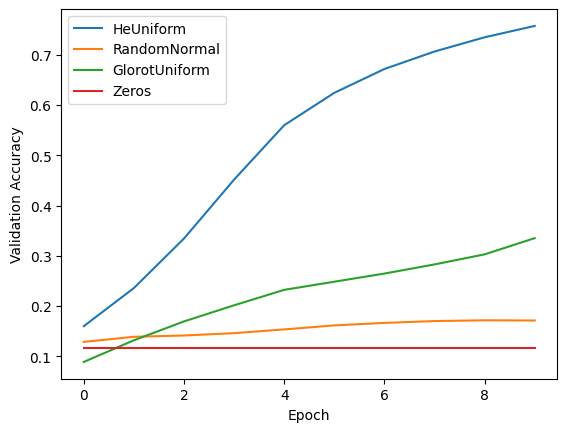

In [60]:
for i in [model_heu, model_normal, model_glorotu, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [61]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return ts.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layer.batchNormalization(trainable= True, scale=True, center =True)
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=ts.keras.initializers.glorot_normal())



    ])

SyntaxError: invalid syntax (1933500712.py, line 4)

In [62]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return ts.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=ts.keras.initializers.glorot_normal())



    ])

In [63]:
simple_model_bn().summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_60 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_61 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)              

In [64]:
init = ts.keras.initializers.random_normal()
activate = 'relu'

optimizer = ts.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 36ms/step - loss: 1.9828 - accuracy: 0.3593 - val_loss: 2.2953 - val_accuracy: 0.2825
Epoch 2/10
19/19 [==============================] - 0s 12ms/step - loss: 1.2976 - accuracy: 0.5920 - val_loss: 2.2856 - val_accuracy: 0.3143
Epoch 3/10
19/19 [==============================] - 0s 11ms/step - loss: 1.0142 - accuracy: 0.6909 - val_loss: 2.2713 - val_accuracy: 0.3265
Epoch 4/10
19/19 [==============================] - 0s 11ms/step - loss: 0.8474 - accuracy: 0.7482 - val_loss: 2.2516 - val_accuracy: 0.3455
Epoch 5/10
19/19 [==============================] - 0s 14ms/step - loss: 0.7378 - accuracy: 0.7853 - val_loss: 2.2251 - val_accuracy: 0.3816
Epoch 6/10
19/19 [==============================] - 0s 14ms/step - loss: 0.6596 - accuracy: 0.8099 - val_loss: 2.1902 - val_accuracy: 0.4416
Epoch 7/10
19/19 [==============================] - 0s 12ms/step - loss: 0.5994 - accuracy: 0.8269 - val_loss: 2.1455 - val_accuracy: 0.5132
Epoch 8/10
19

In [65]:
init = ts.keras.initializers.he_uniform()
activate = 'relu'

optimizer = ts.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 27ms/step - loss: 2.3781 - accuracy: 0.1866 - val_loss: 2.4928 - val_accuracy: 0.1392
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 1.9988 - accuracy: 0.3302 - val_loss: 2.2550 - val_accuracy: 0.2454
Epoch 3/10
19/19 [==============================] - 0s 14ms/step - loss: 1.7729 - accuracy: 0.4253 - val_loss: 2.0490 - val_accuracy: 0.3623
Epoch 4/10
19/19 [==============================] - 1s 55ms/step - loss: 1.5990 - accuracy: 0.5013 - val_loss: 1.8621 - val_accuracy: 0.4643
Epoch 5/10
19/19 [==============================] - 1s 37ms/step - loss: 1.4586 - accuracy: 0.5627 - val_loss: 1.6951 - val_accuracy: 0.5447
Epoch 6/10
19/19 [==============================] - 1s 30ms/step - loss: 1.3429 - accuracy: 0.6101 - val_loss: 1.5471 - val_accuracy: 0.5991
Epoch 7/10
19/19 [==============================] - 1s 33ms/step - loss: 1.2460 - accuracy: 0.6451 - val_loss: 1.4197 - val_accuracy: 0.6415
Epoch 8/10
19

In [66]:
init = ts.keras.initializers.he_uniform()
activate = 'relu'

optimizer = ts.keras.optimizers.Adagrad(learning_rate=0.01)
model_bn_ad = simple_model_bn(init, activate)
model_bn_ad.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ad.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 1s 27ms/step - loss: 2.1081 - accuracy: 0.3019 - val_loss: 2.2232 - val_accuracy: 0.2389
Epoch 2/10
19/19 [==============================] - 0s 10ms/step - loss: 1.4740 - accuracy: 0.5574 - val_loss: 1.8680 - val_accuracy: 0.3919
Epoch 3/10
19/19 [==============================] - 0s 16ms/step - loss: 1.1937 - accuracy: 0.6669 - val_loss: 1.5759 - val_accuracy: 0.5459
Epoch 4/10
19/19 [==============================] - 0s 14ms/step - loss: 0.9985 - accuracy: 0.7361 - val_loss: 1.3238 - val_accuracy: 0.6622
Epoch 5/10
19/19 [==============================] - 0s 14ms/step - loss: 0.8544 - accuracy: 0.7814 - val_loss: 1.1128 - val_accuracy: 0.7341
Epoch 6/10
19/19 [==============================] - 0s 14ms/step - loss: 0.7463 - accuracy: 0.8119 - val_loss: 0.9458 - val_accuracy: 0.7806
Epoch 7/10
19/19 [==============================] - 0s 11ms/step - loss: 0.6636 - accuracy: 0.8332 - val_loss: 0.8156 - val_accuracy: 0.8137
Epoch 8/10
19

In [67]:
init = ts.keras.initializers.he_uniform()
activate = 'relu'

optimizer = ts.keras.optimizers.Adam(learning_rate=0.01)
model_bn_Adam = simple_model_bn(init, activate)
model_bn_Adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_Adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 2s 29ms/step - loss: 0.8787 - accuracy: 0.7481 - val_loss: 2.1995 - val_accuracy: 0.4637
Epoch 2/10
19/19 [==============================] - 0s 12ms/step - loss: 0.2599 - accuracy: 0.9214 - val_loss: 1.0497 - val_accuracy: 0.7406
Epoch 3/10
19/19 [==============================] - 0s 12ms/step - loss: 0.1741 - accuracy: 0.9484 - val_loss: 0.6718 - val_accuracy: 0.8296
Epoch 4/10
19/19 [==============================] - 0s 13ms/step - loss: 0.1299 - accuracy: 0.9623 - val_loss: 0.4365 - val_accuracy: 0.8869
Epoch 5/10
19/19 [==============================] - 0s 13ms/step - loss: 0.1014 - accuracy: 0.9710 - val_loss: 0.3583 - val_accuracy: 0.9067
Epoch 6/10
19/19 [==============================] - 0s 16ms/step - loss: 0.0817 - accuracy: 0.9770 - val_loss: 0.3225 - val_accuracy: 0.9134
Epoch 7/10
19/19 [==============================] - 0s 17ms/step - loss: 0.0669 - accuracy: 0.9806 - val_loss: 0.2570 - val_accuracy: 0.9311
Epoch 8/10
19

In [68]:
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
init = ts.keras.initializers.random_uniform()
activate = 'relu'

optimizer = ts.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Restoring model weights from the end of the best epoch: 13.
Epoch 23: early stopping
Train Acc: 0.9921000003814697 Test Acc: 0.9642000198364258
